In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/adidas%20quarterly%20sales.csv')
data

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558
...,...,...
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752


In [3]:
data['Date'] = pd.to_datetime(data['Time Period'].str.replace(r'(Q\d) (\d+)', r'\2-\1'))
data

/var/folders/1y/fh4hqfb94nl1ck9n1lv83b5m0000gn/T/ipykernel_9286/558263993.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Date'] = pd.to_datetime(data['Time Period'].str.replace(r'(Q\d) (\d+)', r'\2-\1'))


,Time Period,Revenue,Date
0,2000Q1,1517,2000-01-01
1,2000Q2,1248,2000-04-01
2,2000Q3,1677,2000-07-01
3,2000Q4,1393,2000-10-01
4,2001Q1,1558,2001-01-01
...,...,...,...
83,2020Q4,5142,2020-10-01
84,2021Q1,5268,2021-01-01
85,2021Q2,5077,2021-04-01
86,2021Q3,5752,2021-07-01


In [4]:
data.set_index('Date', inplace=True)
del data['Time Period']
data

,Revenue
Date,
2000-01-01,1517
2000-04-01,1248
2000-07-01,1677
2000-10-01,1393
2001-01-01,1558
...,...
2020-10-01,5142
2021-01-01,5268
2021-04-01,5077


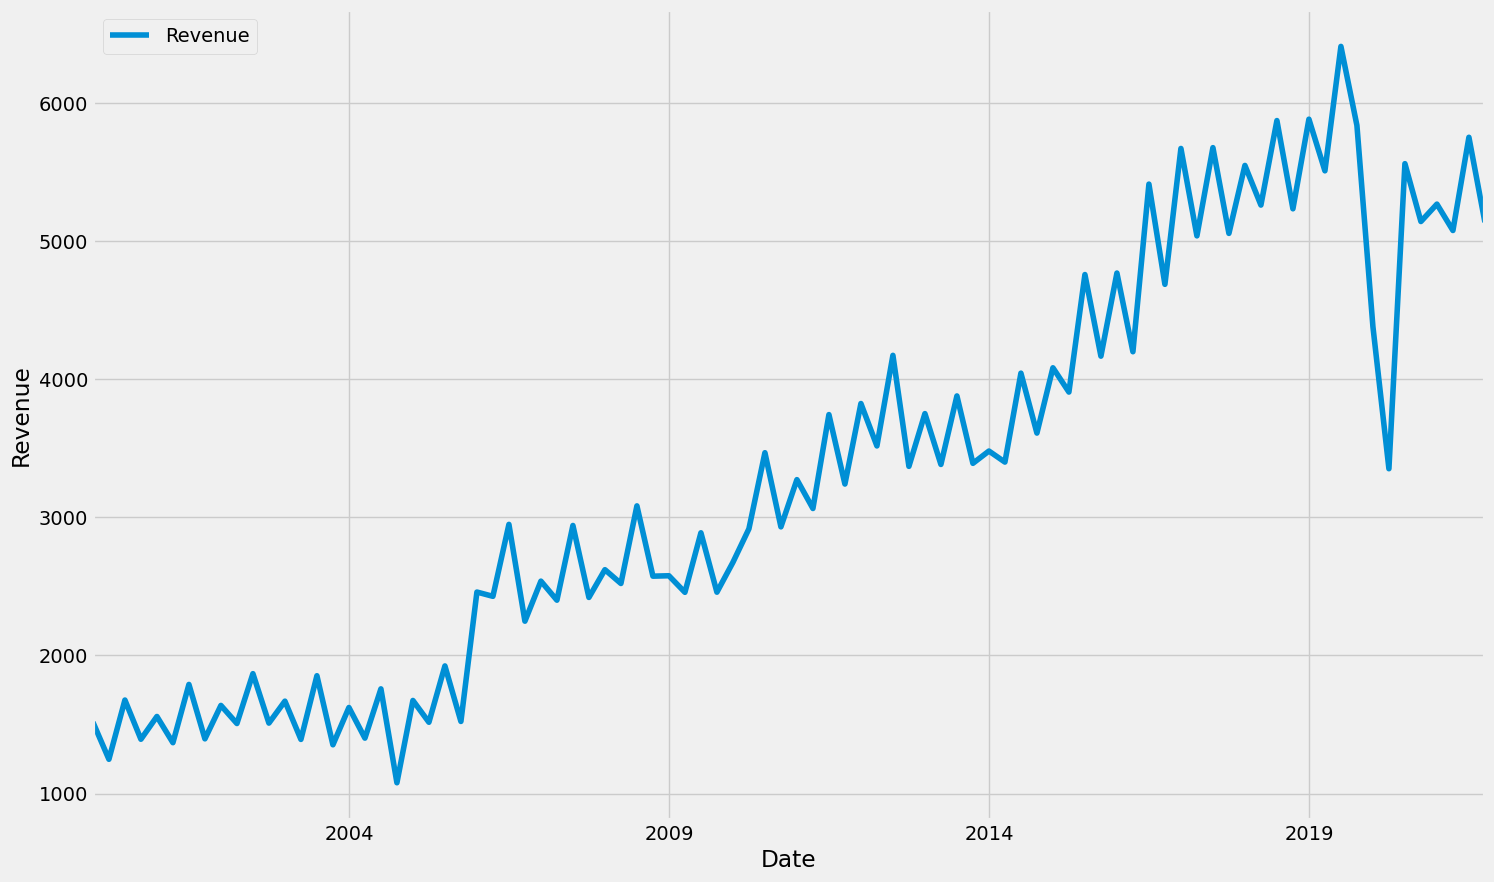

In [5]:
fig, ax = plt.subplots(figsize=(16, 10))
data['Revenue'].plot(ax=ax, label='Revenue')
plt.ylabel('Revenue')
ax.legend()

<Figure size 640x480 with 0 Axes>

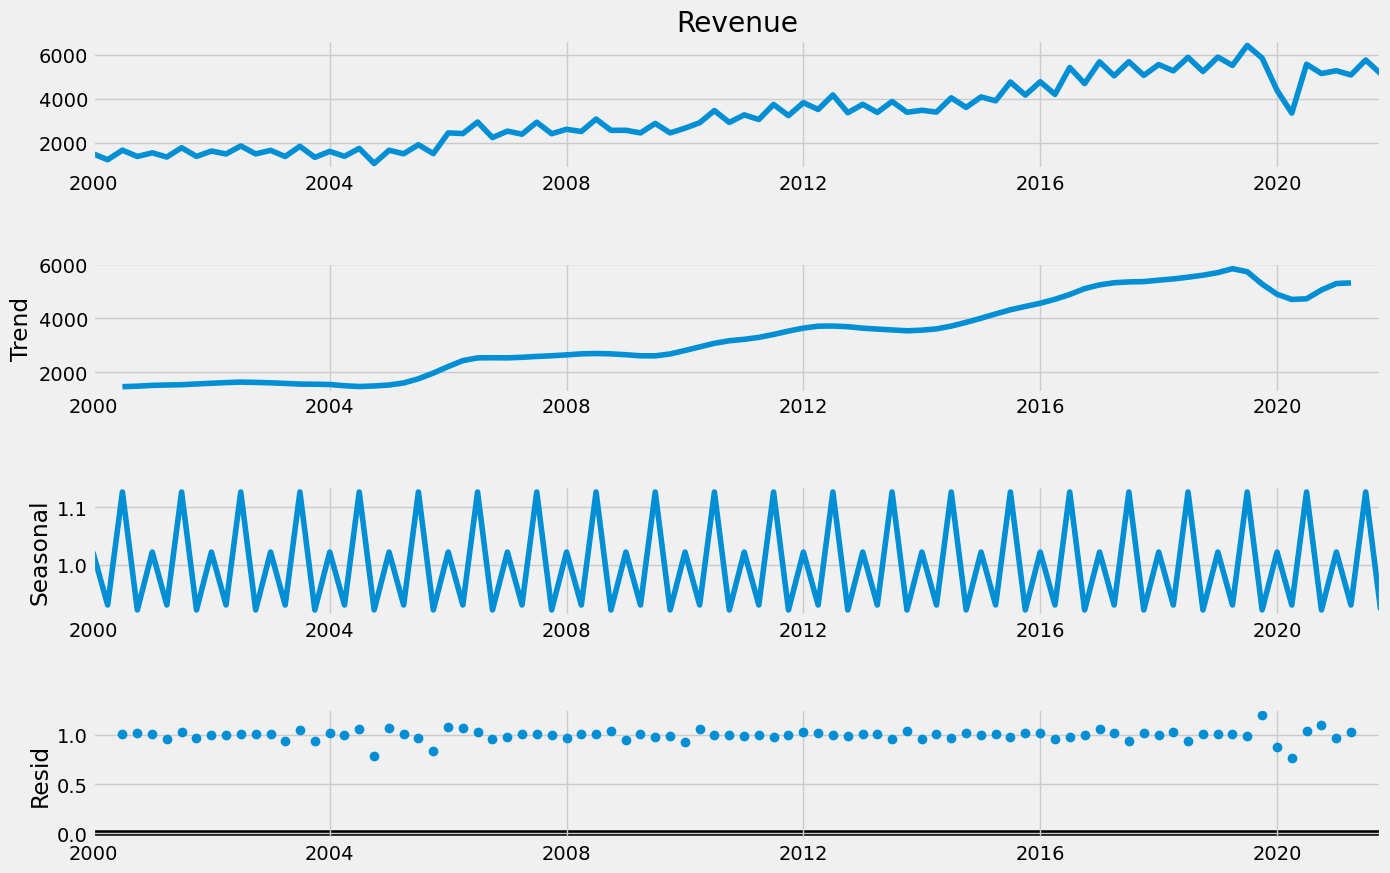

In [6]:
result = seasonal_decompose(data['Revenue'], 
                            model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

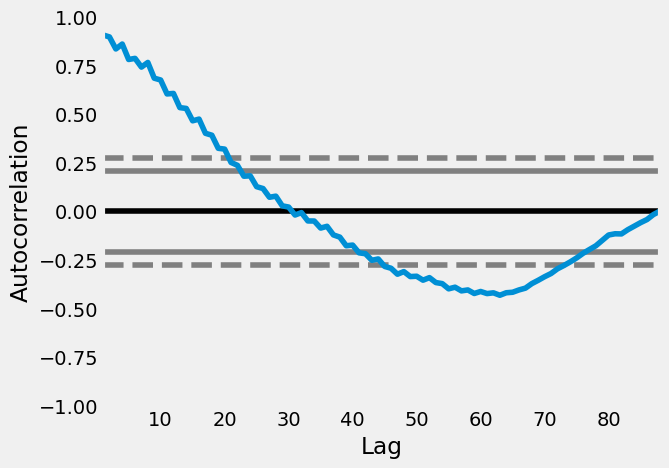

In [7]:
pd.plotting.autocorrelation_plot(data['Revenue'])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


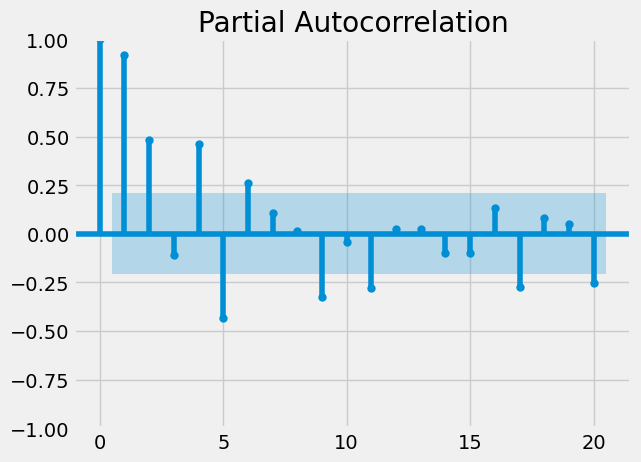

In [8]:
plot_pacf(data.Revenue, lags=20)
plt.show()

In [9]:
# d = 0(stationary), 1(seasonal)
p, d, q = 5, 1, 2

In [10]:
model = sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33485D+00    |proj g|=  1.93340D-01


 This problem is unconstrained.



At iterate    5    f=  6.25430D+00    |proj g|=  3.91119D-03

At iterate   10    f=  6.25345D+00    |proj g|=  6.93402D-03

At iterate   15    f=  6.25320D+00    |proj g|=  8.46356D-04

At iterate   20    f=  6.25286D+00    |proj g|=  5.54391D-03

At iterate   25    f=  6.25065D+00    |proj g|=  2.50242D-02

At iterate   30    f=  6.24288D+00    |proj g|=  2.52666D-02

At iterate   35    f=  6.23758D+00    |proj g|=  1.24248D-02

At iterate   40    f=  6.23441D+00    |proj g|=  1.44234D-02

At iterate   45    f=  6.23342D+00    |proj g|=  5.09496D-03

At iterate   50    f=  6.23319D+00    |proj g|=  1.88105D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Fri, 28 Oct 2022   AIC                           1127.041
Time:                                    12:16:54   BIC                           1161.803
Sample:                                01-01-2000   HQIC                          1140.921
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5797      0.391     -4.045      0.000      -2.345      -0.814
ar.L2         -1.4322      0.589   

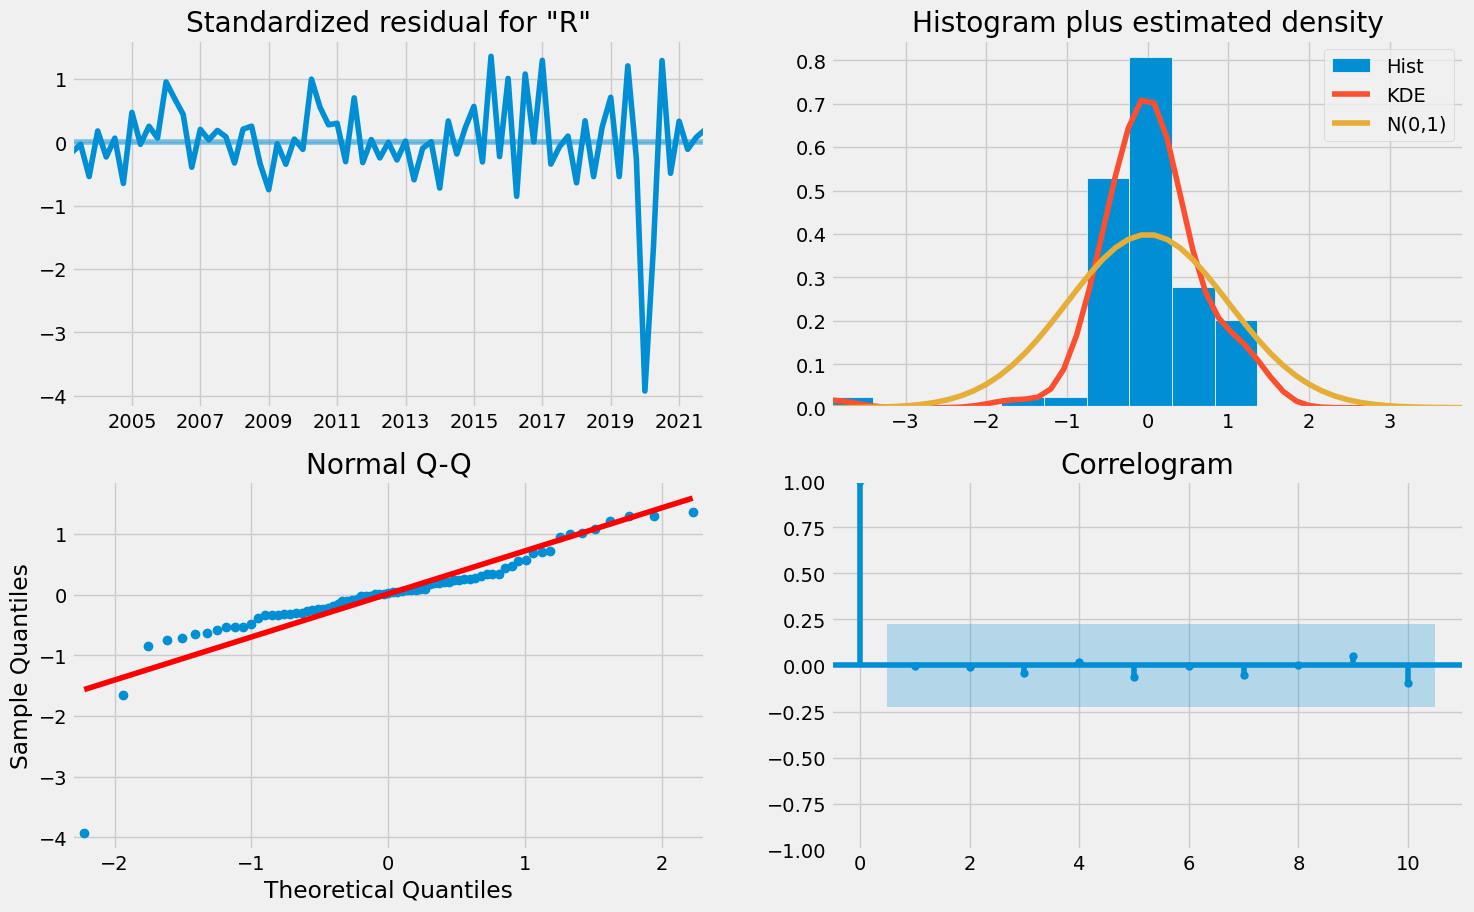

In [11]:
model.plot_diagnostics(figsize=(16, 10))
plt.show()

In [12]:
predictions = model.predict(len(data), len(data)+12)
predictions

2022-01-01    6078.739998
2022-04-01    5186.305060
2022-07-01    6293.168260
2022-10-01    5751.888570
2023-01-01    5911.931313
2023-04-01    5499.787074
2023-07-01    6389.598372
2023-10-01    5728.803626
2024-01-01    6322.817741
2024-04-01    5972.974095
2024-07-01    6648.414806
2024-10-01    6101.929050
2025-01-01    6697.661312
Freq: QS-OCT, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

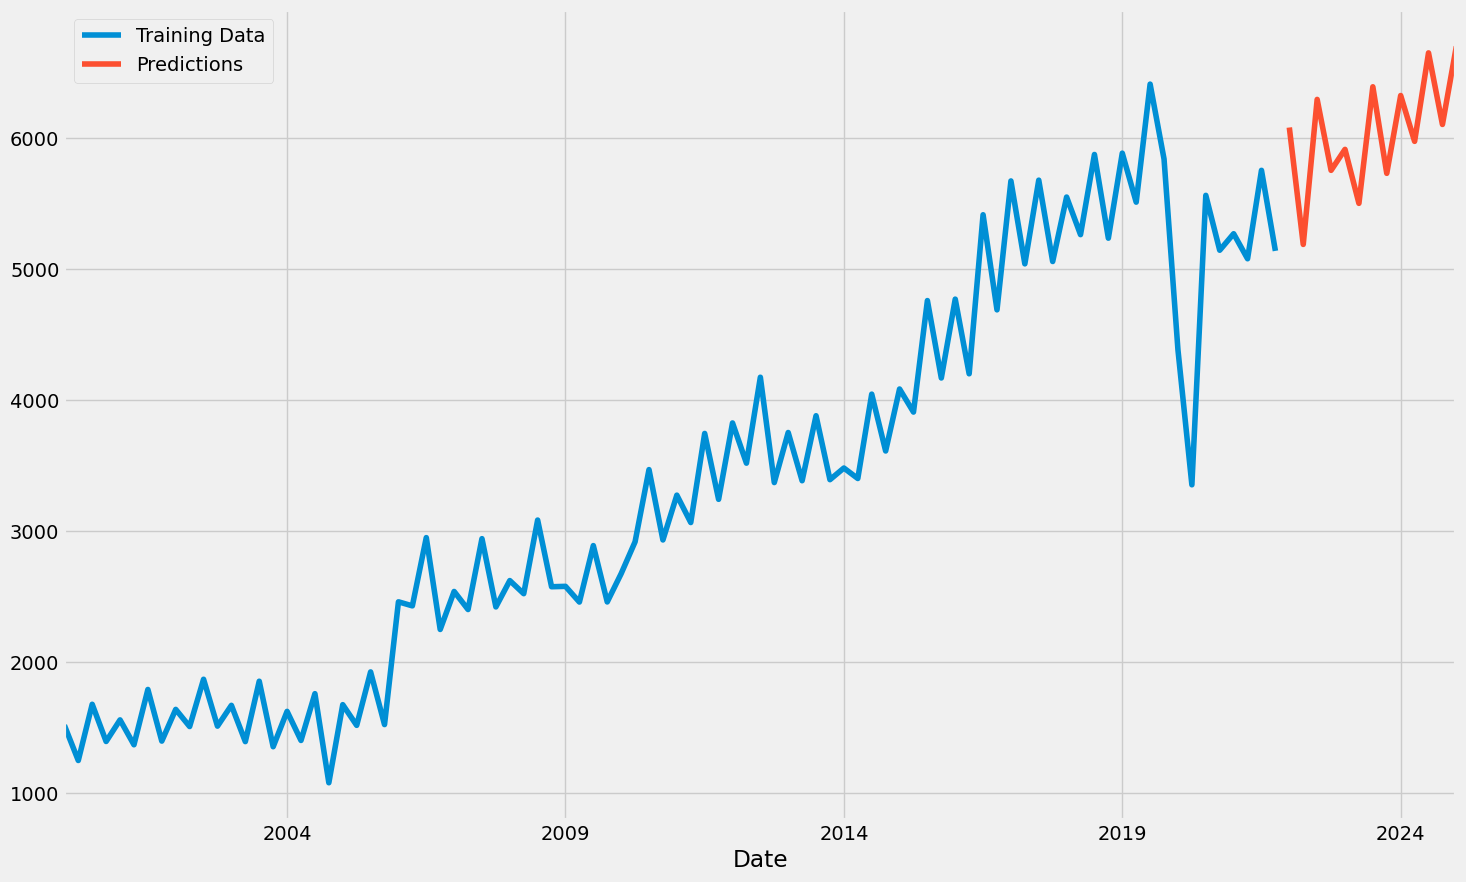

In [13]:
data['Revenue'].plot(legend=True, 
                     label='Training Data', 
                     figsize=(16, 10))
predictions.plot(legend=True, label='Predictions')